<a href="https://colab.research.google.com/github/rcruzjs/DA-100-Analyzing-Data-with-Power-BI/blob/master/teste_bs4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
def scrape_post_titles(url):


      response = requests.get(url)

      html = response.content

      # vai ler a arvore
      soup = BeautifulSoup(html, "html.parser")

      titles = soup.select("h3 a")

      return [title.get_text() for title in titles]



In [35]:
# url baixar
root =  "https://www.r-bloggers.com/"  #"https://www.gov.br/agu/pt-br/composicao/conselho-superior-1/atas-das-reunioes/atas-das-reunioes-2022"

pages = [root] + [f"{root}page/{i}" for i in range(2, 11)]

all_titles = []

for page in pages:
      titles = scrape_post_titles(page)
      #print(titles)
      all_titles.extend(titles)
all_titles
#print(all_titles)
len(all_titles)

200

In [44]:

import re
from tqdm.auto import tqdm
import time

# carrega stop words
stopwords = list(nltk.corpus.stopwords.words("english")) + ['data','using','news']
            #set(nltk.corpus.stopwords.words("english"))
def clean_text(text, stowords=stopwords):
    cleaned_text = text.lower()                      # retira minuscula
    cleaned_text = re.sub(r"\d+","",cleaned_text )   # retira numeros
    cleaned_text = re.sub(r"[^\w\s]", "", cleaned_text)
    words = cleaned_text.split()
    words = [word for word in words if word not in stopwords]
    #time.sleep(0.1)
    return ' '.join(words)

cleaned_titles = [clean_text(title) for title in tqdm(all_titles)]

#clean_text(all_titles[2])


  0%|          | 0/200 [00:00<?, ?it/s]

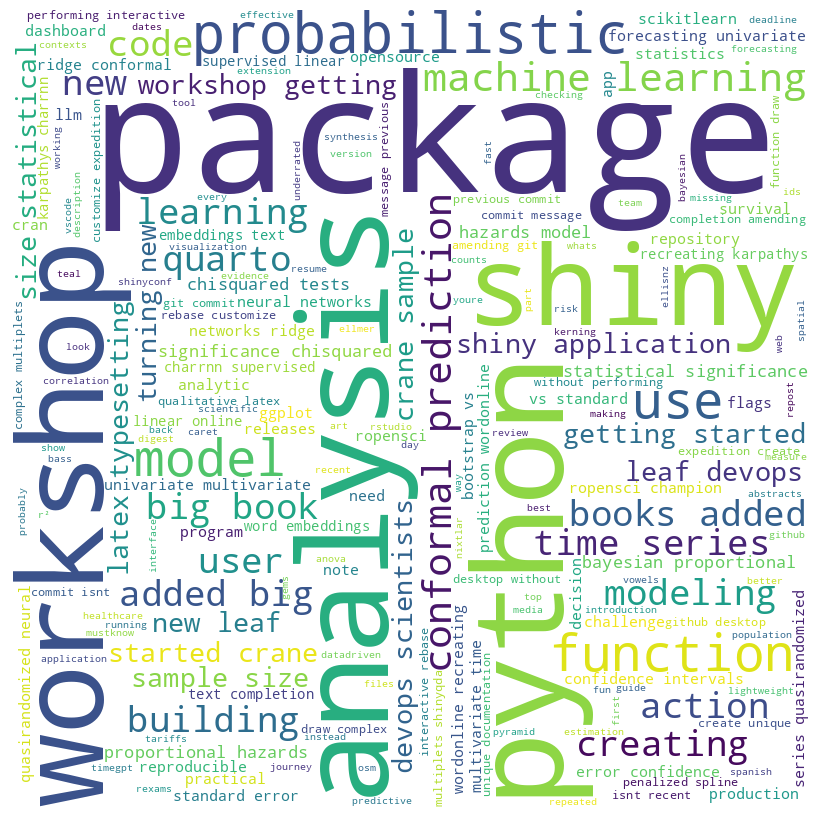

In [45]:
cleaned_titles

from wordcloud import WordCloud
import matplotlib.pyplot as plt

title_combined = ' '.join(cleaned_titles)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(title_combined)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



In [47]:
from collections import Counter

#Counter(titles_combined.split()).most_common(10)
Counter(cleaned_titles).most_common(10)

[('new books added big book r', 4),
 ('latex typesetting r', 4),
 ('turning new leaf', 4),
 ('devops scientists r python workshop', 4),
 ('getting started crane', 4),
 ('sample size statistical significance chisquared tests', 4),
 ('bootstrap vs standard error confidence intervals', 3),
 ('probabilistic forecasting univariate multivariate time series quasirandomized neural networks ridge conformal prediction',
  3),
 ('wordonline recreating karpathys charrnn supervised linear online learning word embeddings text completion',
  3),
 ('amending git commit message previous commit isnt recent github desktop without performing interactive rebase',
  3)]